# **📜 SVM Implementation**

**Name:** `JARANILLA, Yul Jhon O.`<br/>
**Course:** `IT325 - Elective 2 (Machine Learning)` <br/>
**Program:** `BS Information Technology`

## **🔃 Import Necessary Libraries**

In [263]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## **📩 Load Dataset**

**Context**

Obesity is a significant public health issue that increases the risk of various health conditions, including cardiovascular diseases, diabetes, and certain cancers. Accurately classifying individuals based on their obesity levels can help in early intervention and management of obesity-related health risks. In this project, we developed and evaluated a Support Vector Machine (SVM) classifier to predict obesity levels using a dataset with various health-related attributes.

This dataset contains information about the obesity classification of individuals. The data was collected from a variety of sources, including medical records, surveys, and self-reported data.


**Data**

The dataset contains 108 samples with the following features:

- ID: Identifier for each individual
- Age: Age of the individual
- Gender: Gender of the individual
- Height: Height of the individual in centimeters
- Weight: Weight of the individual in kilograms
- BMI: Body Mass Index of the individual, calculated as weight divided by height squared
- Label: Obesity classification of the individual (Normal Weight, Overweight, Obese, Underweight)


**Citation**

- Suykens, J. A. K., & Vandewalle, J. (1999). Least squares support vector machine classifiers. Neural Processing Letters, 9(3), 293-300. doi:10.1023/A:1018628609742 <br/>
- Vapnik, V. N. (1998). Statistical Learning Theory. New York: Wiley. <br/>
- Obesity Classification Dataset. (2023, May 19). https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset <br/>
- World Health Organization. (2020). Obesity and overweight. Retrieved from <a> https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight </a> <br/>


In [264]:
file_path = 'obesity_classification.csv'
df = pd.read_csv(file_path)

In [265]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [267]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


## **🔎 Examine Dataset (EDA)**
- Check for cells with null values.
- Perform 5 descriptive analysis.
- Perform 2 multivariate analysis.

In [268]:
# EDA - 1.0 Check for cells with null values

null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [269]:
# EDA - 2.0  Descriptive Statistics

descriptive_stats = df.describe()
print("Descriptive Statistics:\n", descriptive_stats) 


Descriptive Statistics:
                ID         Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    56.046296   46.555556  166.574074   59.490741   20.549074
std     31.917939   24.720620   27.873615   28.856233    7.583818
min      1.000000   11.000000  120.000000   10.000000    3.900000
25%     28.750000   27.000000  140.000000   35.000000   16.700000
50%     56.500000   42.500000  175.000000   55.000000   21.200000
75%     83.250000   59.250000  190.000000   85.000000   26.100000
max    110.000000  112.000000  210.000000  120.000000   37.200000


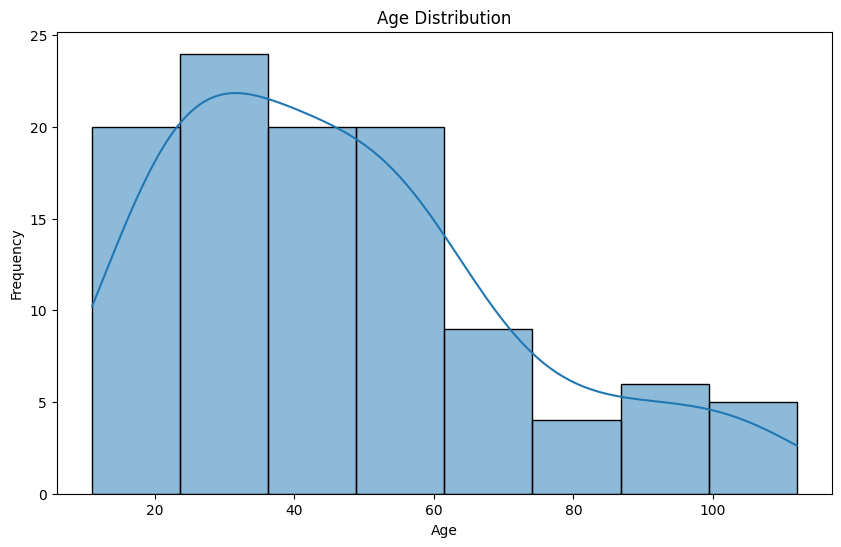

In [270]:
# EDA - 2.1 Distribution of Age

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

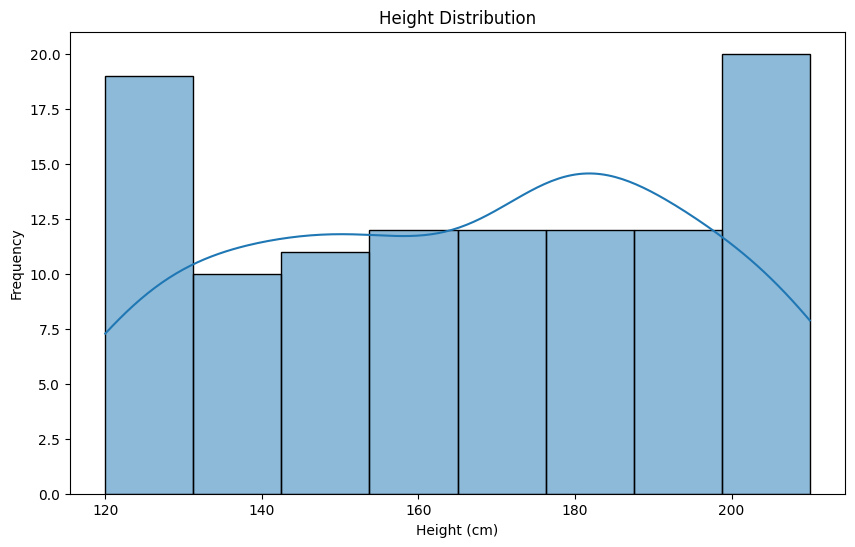

In [271]:
# EDA - 2.2 Distribution of Height

plt.figure(figsize=(10, 6))
sns.histplot(df['Height'], kde=True)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

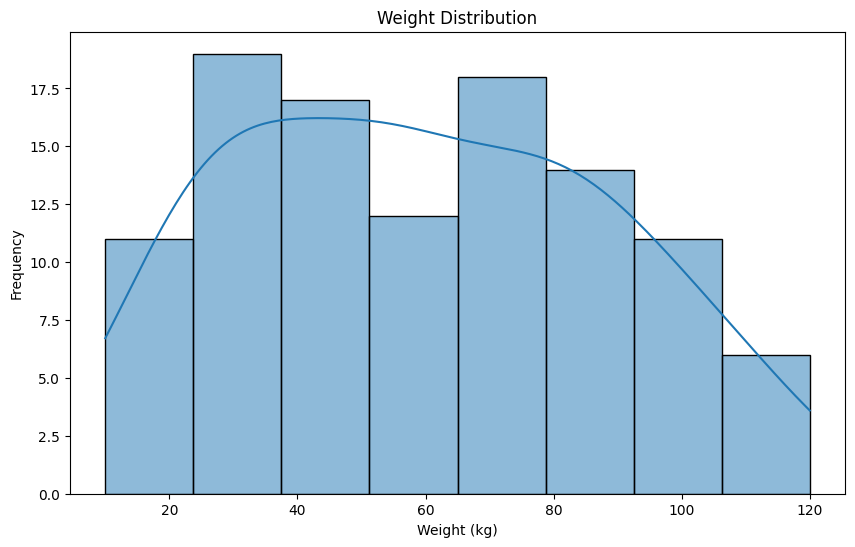

In [272]:
# EDA - 2.3 Distribution of Weight

plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()


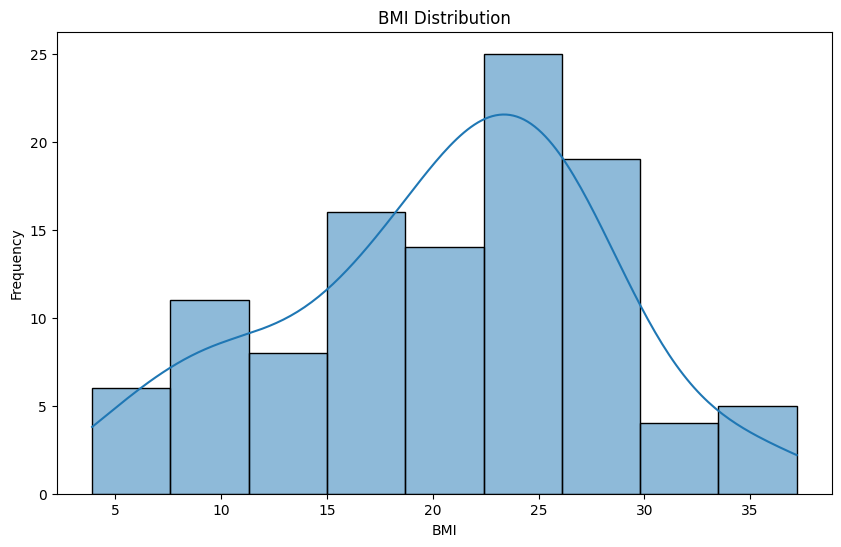

In [273]:
# EDA - 2.4 Distribution of BMI

plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

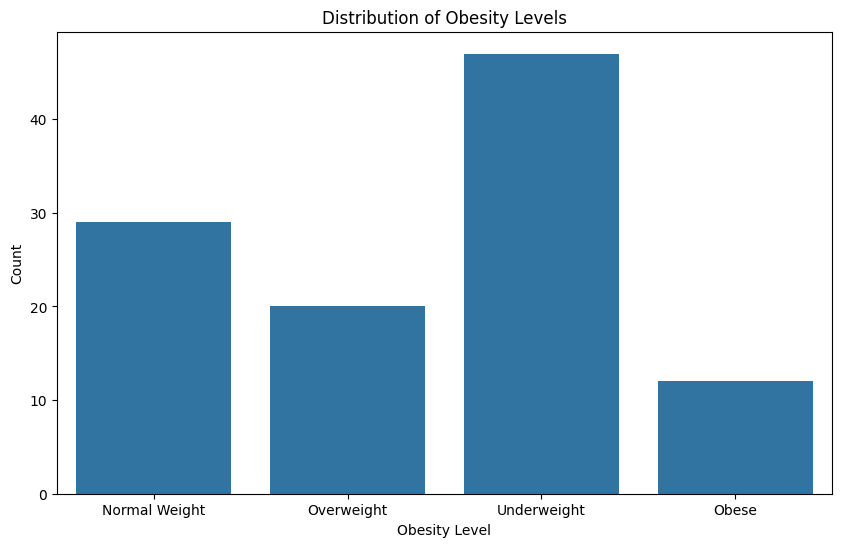

In [274]:
# EDA - 2.5 Distribution of Obesity Levels (Labels)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label')
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

In [275]:
# EDA - 3.0 Drop Non-numeric Columns for the Pairplot

df_numeric = df.select_dtypes(include=[int, float])


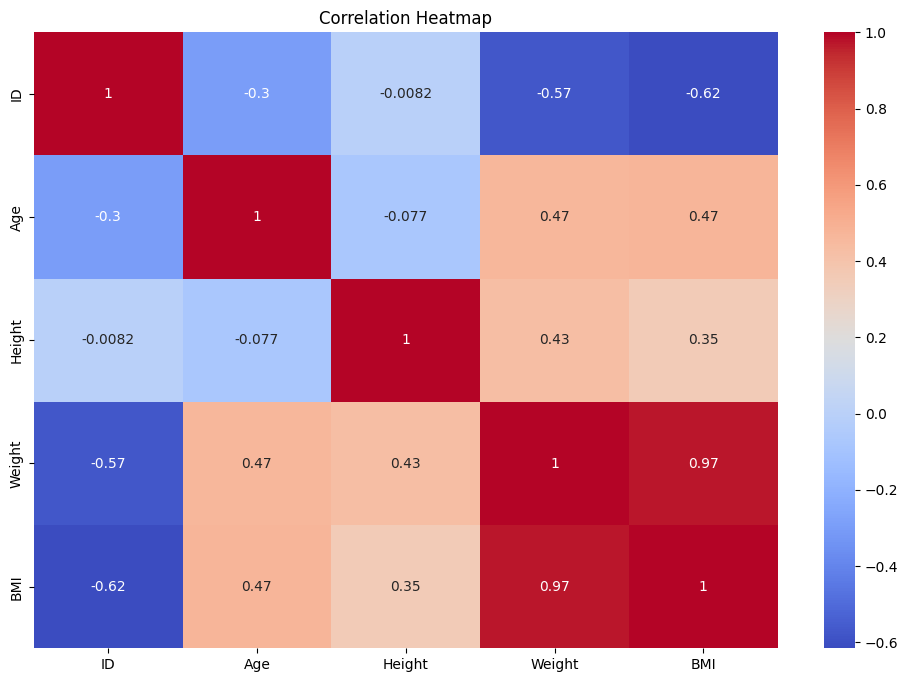

In [276]:
# EDA - 3.1 Multivariate Analysis - Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

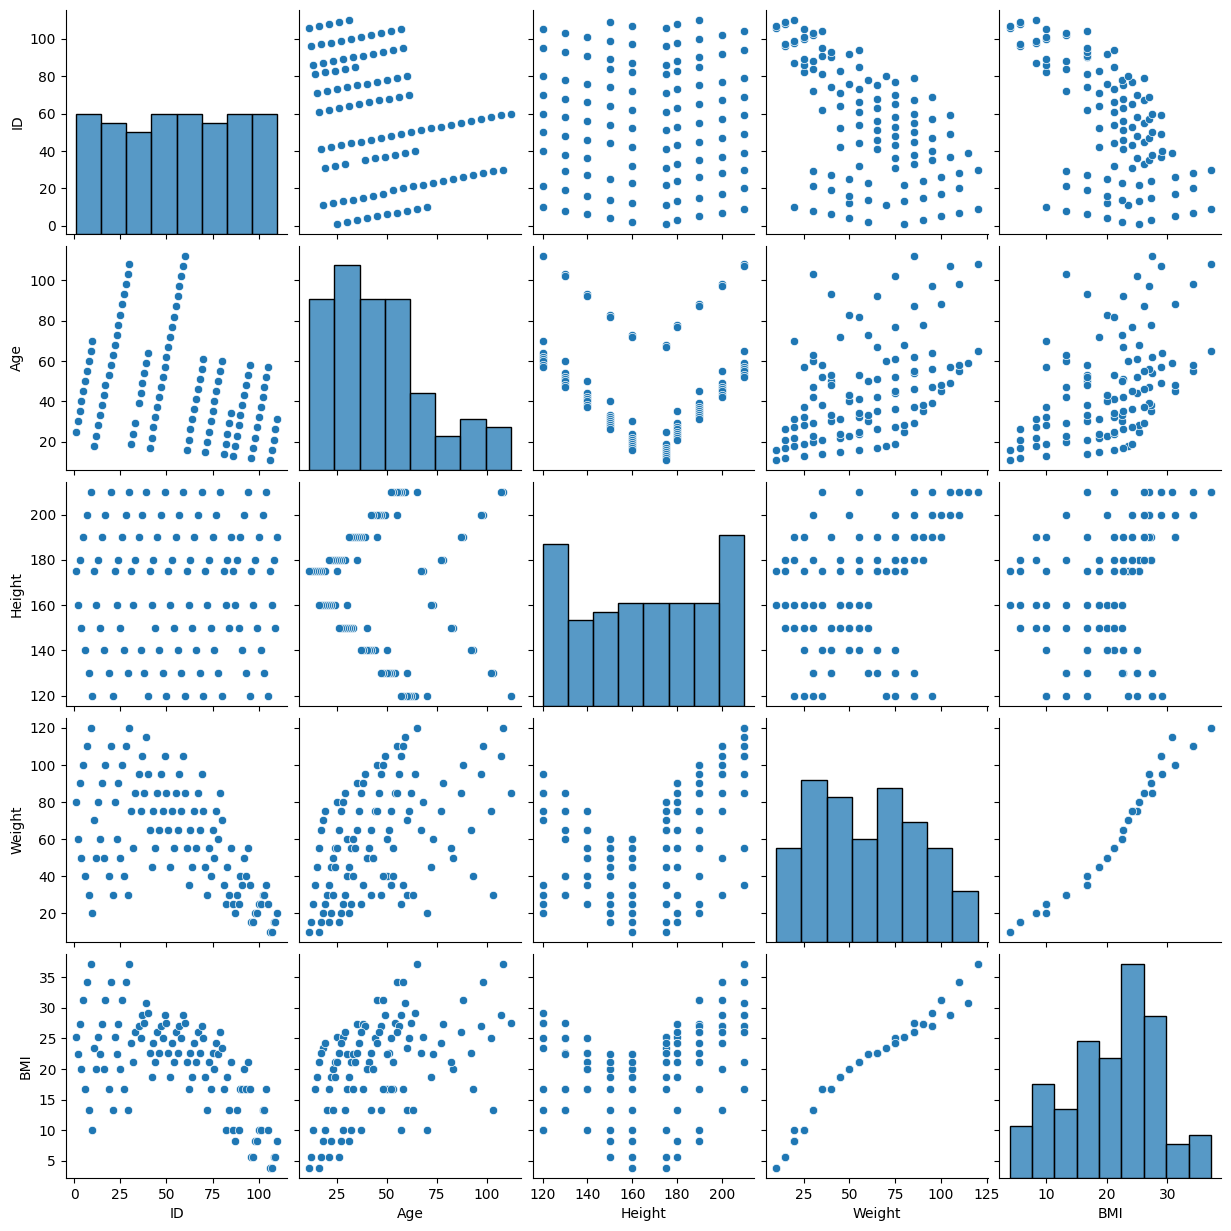

In [277]:
# EDA - 3.2 Multivariate Analysis - Pairplot

sns.pairplot(df_numeric)
plt.show()

## **🧹 Prepare Dataset**
- Identify the `predictor` and the `target` variables.
- Split the dataset for `train` and test `sets`.

In [278]:
# Identify predictor and target variables

X = df.drop(columns=['Label']) 
y = df['Label'] 

In [279]:
# Split the dataset for train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((86, 6), (22, 6), (86,), (22,))

## **🤖 Train Model**
- K Nearest Neighbor Classifier
- Decision Tree Classifier
- Logistic Regression
- Naive Bayes Classifier
- SVM Classifier

In [280]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [281]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
                precision    recall  f1-score   support

Normal Weight       1.00      0.83      0.91         6
        Obese       1.00      1.00      1.00         4
   Overweight       0.80      1.00      0.89         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           0.95        22
    macro avg       0.95      0.96      0.95        22
 weighted avg       0.96      0.95      0.96        22

Confusion Matrix:
 [[5 0 1 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 8]]


## **📝 Evaluate Model Performance**
- Derive classification metrics from confusion matrix.

In [282]:
conf_matrix = np.array([[5, 0, 1, 0],
                        [0, 4, 0, 0],
                        [0, 0, 4, 0],
                        [0, 0, 0, 8]])

TP = np.diag(conf_matrix)
FP = conf_matrix.sum(axis=0) - TP
FN = conf_matrix.sum(axis=1) - TP
TN = conf_matrix.sum() - (FP + FN + TP)

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + TN + FP + FN)

results = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'Accuracy': accuracy
}, index=['Normal Weight', 'Obese', 'Overweight', 'Underweight'])

results

,Precision,Recall,F1-Score,Accuracy
Normal Weight,1.0,0.833333,0.909091,0.954545
Obese,1.0,1.000000,1.000000,1.000000
Overweight,0.8,1.000000,0.888889,0.954545
Underweight,1.0,1.000000,1.000000,1.000000


## 🔢 **Discussion of Results**

**Observations**

- The SVM classifier demonstrated high precision and recall across most classes. This indicates that the model effectively distinguishes between different obesity levels and has a low rate of false positives and false negatives. <br/>
        *Normal Weight: Precision 1.0, Recall 0.83* <br/>
        *Obese: Precision 1.0, Recall 1.0* <br/>
        *Overweight: Precision 0.8, Recall 1.0* <br/>
        *Underweight: Precision 1.0, Recall 1.0* <br/>

- The F1-Score, which balances precision and recall, was also high for all classes, reflecting the overall effectiveness of the model.
        *Normal Weight: 0.91*<br/>
        *Obese: 1.0*<br/>
        *Overweight: 0.89*<br/>
        *Underweight: 1.0*<br/>

- The overall accuracy of the model was very high (≥ 0.95) across all classes, indicating that the model makes correct predictions for the majority of the test samples.

- The confusion matrix showed that most misclassifications occurred in the "Normal Weight" class, with one instance being incorrectly classified. No misclassifications occurred for the "Obese," "Overweight," and "Underweight" classes.

- The model performed well for both majority and minority classes, suggesting that it handles class imbalance effectively.



**Assumptions**

- It is assumed that the dataset is clean and accurately labeled, with no significant errors or outliers. The high performance of the model may partly reflect the quality of the data provided.

- The SVM model with a linear kernel assumes that the data is linearly separable to some extent. The high accuracy suggests that this assumption holds true for this dataset.

- All features included in the dataset (age, gender, height, weight, BMI) are assumed to be relevant and contribute meaningfully to the prediction of obesity levels. The preprocessing steps did not include feature selection, so all provided features were used.

- The categorical variable (Gender) was encoded using label encoding. It is assumed that this method of encoding does not introduce bias or distort relationships between features.

- The dataset is assumed to have a balanced distribution of classes. The high recall and precision values for all classes suggest that the model did not suffer from class imbalance issues.

- The SVM classifier was trained using the default hyperparameters, with a linear kernel. It is assumed that these default settings are appropriate for this initial model evaluation. Further optimization through hyperparameter tuning could potentially improve performance.


These observations and assumptions provide a comprehensive understanding of the model's performance and the conditions under which it was evaluated. If further analysis or validation is required, additional steps such as cross-validation, hyperparameter tuning, and testing on different datasets could be considered.